In [398]:
import numpy as np
import matplotlib.pyplot as plt
from nptdms import TdmsFile

### Data Load

An experiment was conducted on a human subject using CDRR with a resistive band, without applying any stiffness control. This mimics the patient’s movement.

In [399]:
# file_path = '../../data/250609_LJW.tdms'
# selected_indices = X  # 원하는 사이클 인덱스 (0부터 시작)

# file_path = '../../data/250609_JSH.tdms'
# selected_indices = [0,1] 

# file_path = '../../data/250609_KDH_easy.tdms'
# selected_indices = [35,36] 

# file_path = '../../data/250611_KMJ.tdms'
# selected_indices = [0,1] 

# file_path = '../../data/250611_AJW.tdms'
# selected_indices = [13,14]


# file_path = '../../data/250611_PGE.tdms'
# selected_indices = [0,1] 

# file_path = '../../data/250609_HNG_merged.tdms'
# selected_indices = [0,1] 

file_path = '../../data/250612_AIG.tdms'
selected_indices = [0,1]


tdms = TdmsFile.read(file_path)

print("✅ Available groups and channels:")
group_channel_map = {}
for grp in tdms.groups():
    name = grp.name
    channels = [ch.name for ch in grp.channels()]
    group_channel_map[name] = channels
    print(f" - Group: {name}")
    for ch in channels:
        print(f"    • {ch}")

✅ Available groups and channels:
 - Group: Datas
    • Time (ms)
    • Reference Position X
    • Reference Position Y
    • Measured Position X
    • Measured Position Y
    • Reference Tension L
    • Reference Tension R
    • Reference Tension T
    • Measured Tension L
    • Measured Tension R
    • Measured Tension T
    • RBF1
    • RBF2
    • RBF3
    • RBF4
    • RBF5
    • Trajectory
    • Projected Force
    • Force X
    • Force Y
    • Damp1
    • Damp2
    • Damp3
    • Damp4
    • Damp5
    • Experiment Step


### Data Plot


▶ Using group: Datas


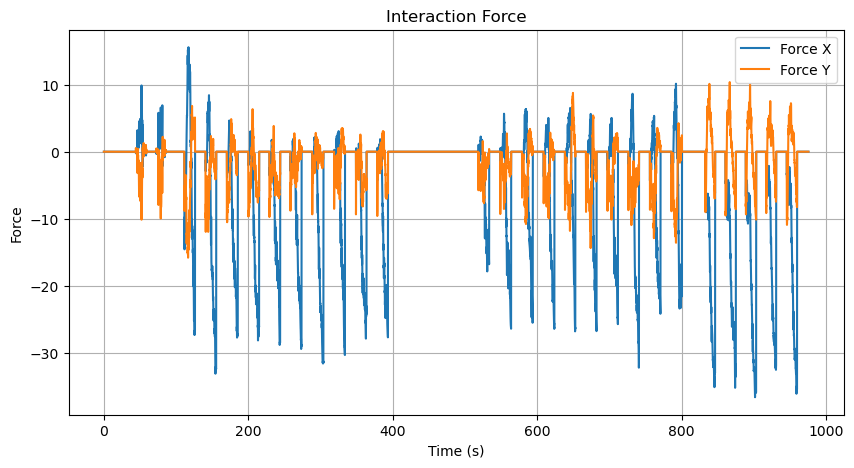

In [400]:
group = 'Datas' if 'Datas' in group_channel_map else list(group_channel_map.keys())[0]
print(f"\n▶ Using group: {group}")

traj = tdms[group]['Trajectory'][:]    # Trajectory 로드
time = np.arange(len(traj)) / 50       # 시간 데이터 생성 (50Hz 가정)

mask = (traj == 1)                     # Traj=1 위치

# Force X, Y 데이터에서 Trajectory가 1인 위치만 필터링
fx = tdms[group]['Force X'][:]
fy = tdms[group]['Force Y'][:]
fx_traj = np.where(mask, fx, 0)
fy_traj = np.where(mask, fy, 0)

plt.figure(figsize=(10,5))
plt.plot(time, fx_traj, color='C0', label='Force X')
plt.plot(time, fy_traj, color='C1', label='Force Y')
plt.title('Interaction Force')
plt.xlabel('Time (s)')
plt.ylabel('Force')
plt.legend()
plt.grid(True)
plt.show()


▶ Using group: Datas


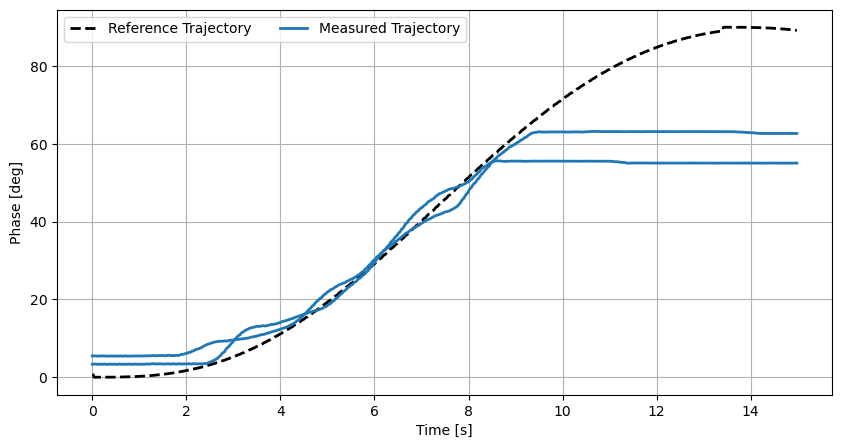

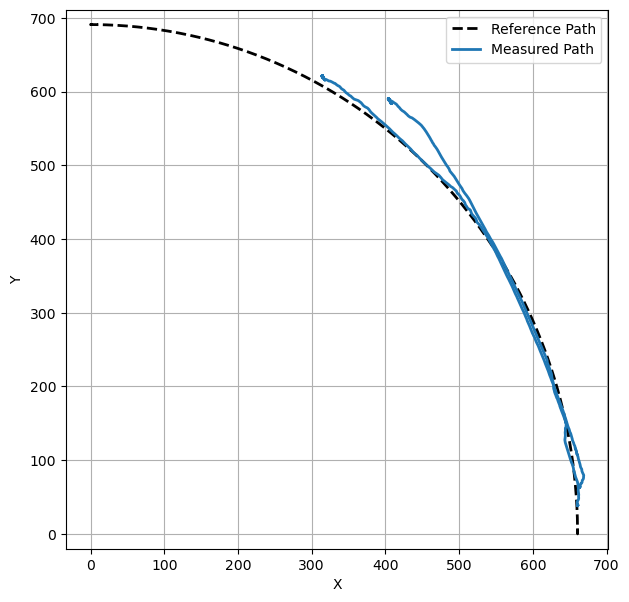

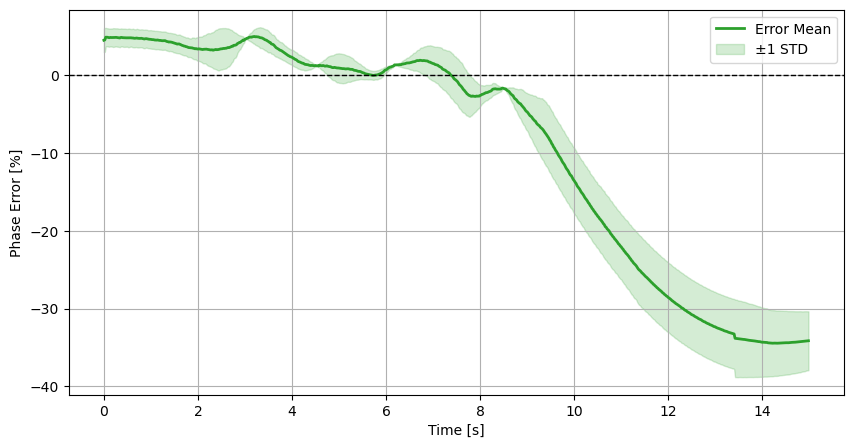

In [401]:
group = 'Datas' if 'Datas' in group_channel_map else list(group_channel_map.keys())[0]
print(f"\n▶ Using group: {group}")

sample_rate  = 50
cut_sec      = 15
num_cycles   = 5
base_color   = 'C0'
lw_overlay   = 2    # Overlay plot 굵기

traj   = tdms[group]['Trajectory'][:]
ref_x  = tdms[group]['Reference Position X'][:]
ref_y  = tdms[group]['Reference Position Y'][:]
act_x  = tdms[group]['Measured Position X'][:]
act_y  = tdms[group]['Measured Position Y'][:]
time   = np.arange(len(traj)) / sample_rate

traj_bin = (traj > 0.5).astype(int)
phase_ref_deg = np.degrees((np.arctan2(ref_y, ref_x) + 2*np.pi) % (2*np.pi))
phase_act_deg = np.degrees((np.arctan2(act_y, act_x) + 2*np.pi) % (2*np.pi))
phase_ref_deg = ((phase_ref_deg + 180) % 360) - 180
phase_act_deg = ((phase_act_deg + 180) % 360) - 180

cut_len = int(cut_sec * sample_rate)
rising_idx = np.where((traj_bin[:-1] == 0) & (traj_bin[1:] == 1))[0] + 1

segments_act, segments_ref = [], []
segments_refX, segments_refY = [], []
segments_actX, segments_actY = [], []
segments_err = []

# for s in rising_idx[-num_cycles:]:
#     if s + cut_len <= len(traj_bin):
#         # phase trajectory
#         seg_act = phase_act_deg[s:s+cut_len].copy()
#         seg_ref = phase_ref_deg[s:s+cut_len].copy()
#         segments_act.append(seg_act)
#         segments_ref.append(seg_ref)
#         # Cartesian trajectory
#         segments_refX.append(ref_x[s:s+cut_len].copy())
#         segments_refY.append(ref_y[s:s+cut_len].copy())
#         segments_actX.append(act_x[s:s+cut_len].copy())
#         segments_actY.append(act_y[s:s+cut_len].copy())
#         # error
#         seg_err = (seg_ref - seg_act)
#         seg_err = (seg_err + 180) % 360 - 180  # -180~180 wrap
#         seg_err_scaled = seg_err / -90 * 100
#         segments_err.append(seg_err_scaled)



for i in selected_indices:
    if i < len(rising_idx):
        s = rising_idx[i]
        if s + cut_len <= len(traj_bin):
            # phase trajectory
            seg_act = phase_act_deg[s:s+cut_len].copy()
            seg_ref = phase_ref_deg[s:s+cut_len].copy()
            segments_act.append(seg_act)
            segments_ref.append(seg_ref)
            # Cartesian trajectory
            segments_refX.append(ref_x[s:s+cut_len].copy())
            segments_refY.append(ref_y[s:s+cut_len].copy())
            segments_actX.append(act_x[s:s+cut_len].copy())
            segments_actY.append(act_y[s:s+cut_len].copy())
            # error
            seg_err = (seg_ref - seg_act)
            seg_err = (seg_err + 180) % 360 - 180  # -180~180 wrap
            seg_err_scaled = seg_err / -90 * 100
            segments_err.append(seg_err_scaled)



if len(segments_act) == 0:
    print("추출된 cycle이 없습니다.")
else:
    segments_act = np.vstack(segments_act)
    segments_ref = np.vstack(segments_ref)
    segments_refX = np.vstack(segments_refX)
    segments_refY = np.vstack(segments_refY)
    segments_actX = np.vstack(segments_actX)
    segments_actY = np.vstack(segments_actY)
    segments_err = np.vstack(segments_err)
    t_short = np.arange(cut_len) / sample_rate

    # === Phase Overlay Plot ===
    plt.figure(figsize=(10,5))
    plt.plot(t_short, segments_ref[-1], color='black', linestyle='--', linewidth=lw_overlay, label='Reference Trajectory')
    for idx2, seg in enumerate(segments_act):
        alpha = 1
        lw = 2
        if idx2 == len(segments_act)-1:
            label = 'Measured Trajectory'
        else:
            label = None
        plt.plot(t_short, seg, color=base_color, alpha=alpha, lw=lw_overlay, label=label)
    plt.xlabel('Time [s]')
    plt.ylabel('Phase [deg]')
    # plt.title(f'Overlay: Last {num_cycles} cycles (Each {cut_sec}s)')
    plt.legend(ncol=2)
    plt.grid(True)
    plt.show()

    # === Cartesian Overlay Plot ===
    plt.figure(figsize=(7,7))
    plt.plot(segments_refX[-1], segments_refY[-1], 'k--', lw=lw_overlay, label='Reference Path')
    for idx2, seg in enumerate(segments_act):
        alpha = 1
        lw = 2
        if idx2 == len(segments_act)-1:
            label = 'Measured Path'
        else:
            label = None
        plt.plot(segments_actX[idx2], segments_actY[idx2], color=base_color, alpha=alpha, lw=lw_overlay, label=label if idx2==len(segments_actX)-1 else None)
    plt.xlabel('X')
    plt.ylabel('Y')
    # plt.title(f'Cartesian Overlay: Last {num_cycles} cycles')
    plt.legend()
    plt.axis('equal')
    plt.grid(True)
    plt.show()

    # === Error Mean ± STD Plot ===
    mean_err = np.mean(segments_err, axis=0)
    std_err  = np.std(segments_err, axis=0)
    plt.figure(figsize=(10,5))
    plt.plot(t_short, mean_err, color='C2', lw=2, label='Error Mean')
    plt.fill_between(t_short, mean_err-std_err, mean_err+std_err, color='C2', alpha=0.2, label='±1 STD')
    plt.axhline(0, color='k', linestyle='--', lw=1)
    plt.xlabel('Time [s]')
    plt.ylabel('Phase Error [%]')
    # plt.title(f'Phase Error (Mean ± STD), Last {num_cycles} cycles, Each {cut_sec}s')
    plt.legend()
    plt.grid(True)
    plt.show()

### Find Switching Point

In [402]:
# === 기존 코드 이후, error first-hit 지점 탐색 추가 ===
import numpy as np

# 1) 사이클 수 및 최종 위상 요약
n_cycles = segments_act.shape[0]
print(f"그려진 사이클 개수: {n_cycles}")

last_act_each = segments_act[:, -1]
last_ref_each = segments_ref[:, -1]
for i in range(n_cycles):
    print(f"Cycle {i}: ref={last_ref_each[i]:.2f}°, act={last_act_each[i]:.2f}°")
print(f"마지막 시점 ACT 평균: {np.mean(last_act_each):.2f}°\n")

# 2) 에러가 -5% 이하가 되는 최초 시점 찾기
threshold = -5
print(f"--- 에러가 {threshold}% 이하가 되는 최초 시점 ---")
for i in range(n_cycles):
    idx = np.where(segments_err[i] <= threshold)[0]
    if idx.size > 0:
        t_hit = t_short[idx[0]]
        print(f"Cycle {i}: {t_hit:.3f} s (샘플 인덱스 {idx[0]})")
    else:
        print(f"Cycle {i}: 에러가 {threshold}% 이하로 떨어지지 않음")

# 3) 평균 에러 기준 첫 도달 시각
# (만약 mean_err를 이미 계산했다면 재계산 불필요)
mean_err = np.mean(segments_err, axis=0)
idx_mean = np.where(mean_err <= threshold)[0]
if idx_mean.size > 0:
    print(f"평균 에러: 최초로 {threshold}% 이하에 도달한 시각 {t_short[idx_mean[0]]:.3f} s")
else:
    print("평균 에러가 임계값 이하로 떨어지지 않음")


그려진 사이클 개수: 2
Cycle 0: ref=90.00°, act=62.68°
Cycle 1: ref=89.19°, act=55.06°
마지막 시점 ACT 평균: 58.87°

--- 에러가 -5% 이하가 되는 최초 시점 ---
Cycle 0: 7.700 s (샘플 인덱스 385)
Cycle 1: 8.800 s (샘플 인덱스 440)
평균 에러: 최초로 -5% 이하에 도달한 시각 9.040 s


=== Time Correlation Matrix ===
            SwitchTime  BaseTime
SwitchTime        1.00      0.47
BaseTime          0.47      1.00

=== Angle Correlation Matrix ===
             SwitchAngle  BaseAngle
SwitchAngle         1.00       0.92
BaseAngle           0.92       1.00


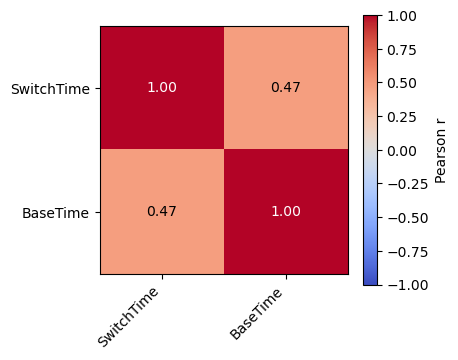

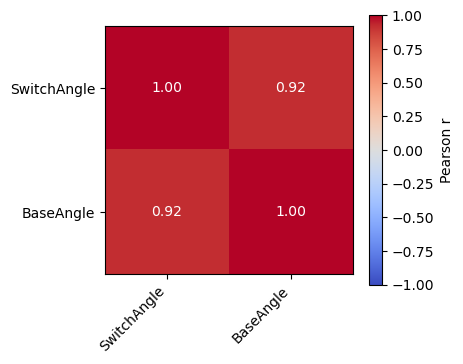

In [409]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 입력
names = ['JSH', 'KDH', 'KMJ', 'AJW', 'PGE', 'HNG', 'AIG']

# 초기 능력 (Switch: 기계介입 전), 실제 결과 (Base: 기계介입 후)
switch_time  = [8.185, 12.620, 7.680, 8.095, 8.410, 2.655, 8.105]
base_time    = [9.500, 13.000, 6.140, 7.920, 3.800, 7.780, 9.040]

switch_angle = [46.74, 85.99, 42.84, 48.20, 51.31, 5.34, 47.98]
base_angle   = [65.16, 79.98, 60.05, 57.80, 52.42, 40.92, 58.87]

# 2. 데이터프레임 생성
df_time = pd.DataFrame({'SwitchTime': switch_time, 'BaseTime': base_time})
df_angle = pd.DataFrame({'SwitchAngle': switch_angle, 'BaseAngle': base_angle})

# 3. 상관계수 계산
corr_time = df_time.corr()
corr_angle = df_angle.corr()

# 4. 히트맵 그리는 함수
def plot_corr_heatmap(corr, title):
    plt.figure(figsize=(4, 3.5))
    plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
    plt.colorbar(label='Pearson r')
    labels = corr.columns
    ticks = np.arange(len(labels))
    plt.xticks(ticks, labels, rotation=45, ha='right')
    plt.yticks(ticks, labels)
    for i in range(len(labels)):
        for j in range(len(labels)):
            val = corr.iat[i, j]
            color = 'white' if abs(val) > 0.5 else 'black'
            plt.text(j, i, f"{val:.2f}", ha='center', va='center', color=color)
    # plt.title(title)
    # plt.tight_layout()
    plt.show()

# 5. 콘솔 출력 및 히트맵 시각화
print("=== Time Correlation Matrix ===")
print(corr_time.round(2))

print("\n=== Angle Correlation Matrix ===")
print(corr_angle.round(2))

plot_corr_heatmap(corr_time, "Correlation: SwitchTime vs BaseTime")
plot_corr_heatmap(corr_angle, "Correlation: SwitchAngle vs BaseAngle")



--- 기술통계 (터미널 출력) ---
          Switch  ZeroCrossTime  ZeroCrossAngle
count   7.000000       7.000000        7.000000
mean   59.314286       7.964286       46.914286
std    11.903478       2.893362       23.431012
min    40.920000       2.655000        5.340000
25%    55.110000       7.887500       44.790000
50%    58.870000       8.105000       47.980000
75%    62.605000       8.297500       49.755000
max    79.980000      12.620000       85.990000

--- 상관계수 (터미널 출력) ---
                  Switch  ZeroCrossTime  ZeroCrossAngle
Switch          1.000000       0.927294        0.917567
ZeroCrossTime   0.927294       1.000000        0.998244
ZeroCrossAngle  0.917567       0.998244        1.000000

%% -------- LaTeX: 기술통계 표 --------
\begin{tabular}{lrrr}
\toprule
 & Switch & ZeroCrossTime & ZeroCrossAngle \\
\midrule
count & 7.00 & 7.00 & 7.00 \\
mean & 59.31 & 7.96 & 46.91 \\
std & 11.90 & 2.89 & 23.43 \\
min & 40.92 & 2.65 & 5.34 \\
25% & 55.11 & 7.89 & 44.79 \\
50% & 58.87 & 8.11 & 47.98

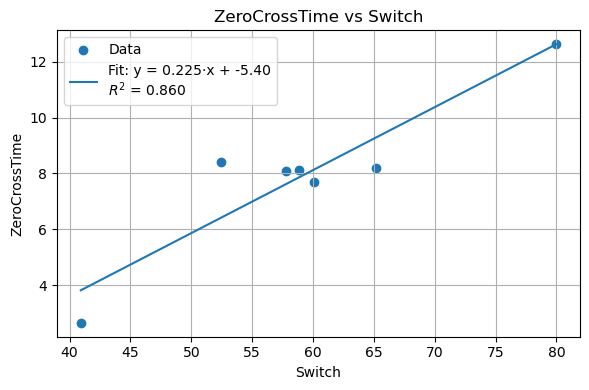

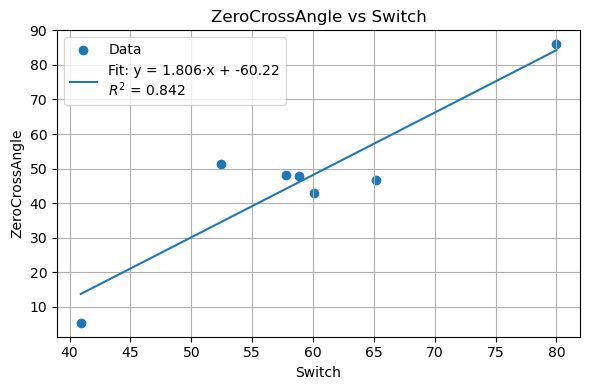

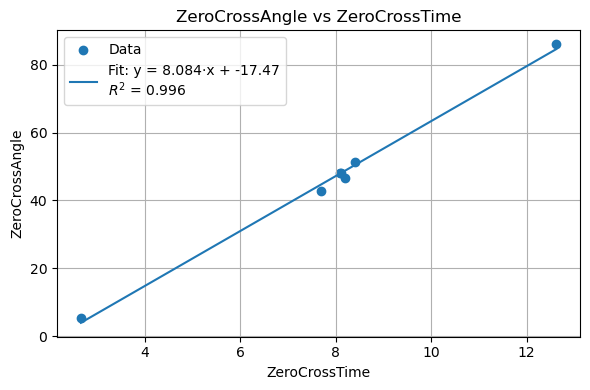

In [404]:
# -*- coding: utf-8 -*-
"""
Switch · Zero-cross Time · Zero-cross Angle
통계 요약, 상관 분석, 회귀선 포함 산점도(고해상도 PNG) 생성 스크립트
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# ----------------------------------------------------------------------
# 1. 데이터 입력
# ----------------------------------------------------------------------
names  = ['JSH', 'KDH', 'KMJ', 'AJW', 'PGE', 'HNG', 'AIG']
switch = [65.16, 79.98, 60.05, 57.80, 52.42, 40.92, 58.87]
zc_time  = [8.185, 12.620, 7.680, 8.095, 8.410, 2.655, 8.105]
zc_angle = [46.74, 85.99, 42.84, 48.20, 51.31, 5.34, 47.98]

df = pd.DataFrame({
    'Name':            names,
    'Switch':          switch,
    'ZeroCrossTime':   zc_time,
    'ZeroCrossAngle':  zc_angle
})

# ----------------------------------------------------------------------
# 2. 기술통계 & 상관계수 (LaTeX 포함)
# ----------------------------------------------------------------------
desc = df[['Switch', 'ZeroCrossTime', 'ZeroCrossAngle']].describe()
corr = df[['Switch', 'ZeroCrossTime', 'ZeroCrossAngle']].corr()

print("\n--- 기술통계 (터미널 출력) ---")
print(desc)

print("\n--- 상관계수 (터미널 출력) ---")
print(corr)

print("\n%% -------- LaTeX: 기술통계 표 --------")
print(desc.to_latex(float_format="%.2f"))

print("\n%% -------- LaTeX: 상관계수 표 --------")
print(corr.to_latex(float_format="%.2f"))

# ----------------------------------------------------------------------
# 3. 산점도 + 회귀선 + R² 계산  (PNG, 300 dpi 저장)
# ----------------------------------------------------------------------
pairs = [
    ('Switch',         'ZeroCrossTime'),
    ('Switch',         'ZeroCrossAngle'),
    ('ZeroCrossTime',  'ZeroCrossAngle')
]

for x_var, y_var in pairs:
    x = df[x_var]
    y = df[y_var]
    
    # 선형 회귀
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # 회귀선 좌표
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = slope * x_line + intercept
    
    # 그래프 그리기
    plt.figure(figsize=(6, 4))
    plt.scatter(x, y, label='Data')
    plt.plot(x_line, y_line,
             label=f'Fit: y = {slope:.3f}·x + {intercept:.2f}\n$R^2$ = {r_value**2:.3f}')
    
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.title(f'{y_var} vs {x_var}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # # 파일 저장
    # fname = f'{y_var}_vs_{x_var}.png'
    # plt.savefig(fname, dpi=300, bbox_inches='tight')
    # print(f'  → "{fname}" 저장 완료')
    plt.show()


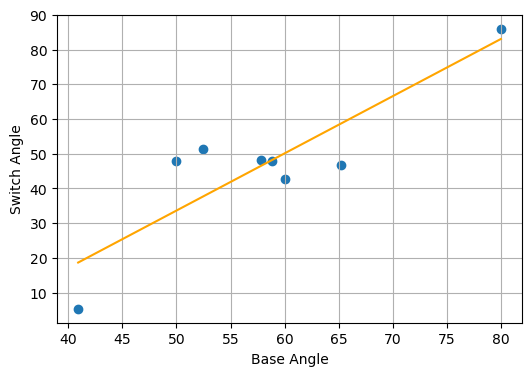

In [416]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# 데이터 입력
names  = ['LJW','JSH', 'KDH', 'KMJ', 'AJW', 'PGE', 'HNG', 'AIG']
switch = [50,65.16, 79.98, 60.05, 57.80, 52.42, 40.92, 58.87]
zc_angle = [47.98,46.74, 85.99, 42.84, 48.20, 51.31, 5.34, 47.98]

df = pd.DataFrame({
    'Name': names,
    'Switch': switch,
    'ZeroCrossAngle': zc_angle
})

# 변수 선택
x = df['Switch']
y = df['ZeroCrossAngle']

# 선형 회귀
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# 회귀선 좌표
x_line = np.linspace(x.min(), x.max(), 100)
y_line = slope * x_line + intercept

# 그래프 그리기
plt.figure(figsize=(6, 4))
plt.scatter(x, y, label='Data')
plt.plot(x_line, y_line,
         label=f'Fit: y = {slope:.3f}·x + {intercept:.2f}\n$R^2$ = {r_value**2:.3f}',
         color='orange')

plt.xlabel('Base Angle')
plt.ylabel('Switch Angle')
# plt.title('ZeroCrossAngle vs Switch')
# plt.legend()
plt.grid(True)
plt.show()



▶ Using group: Datas


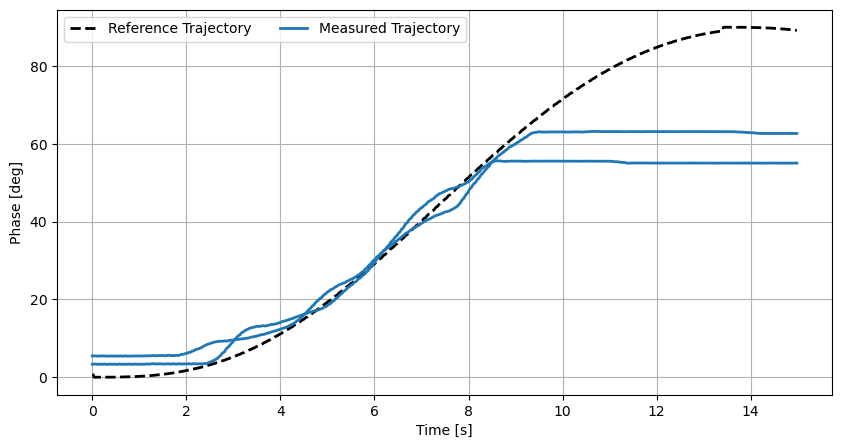

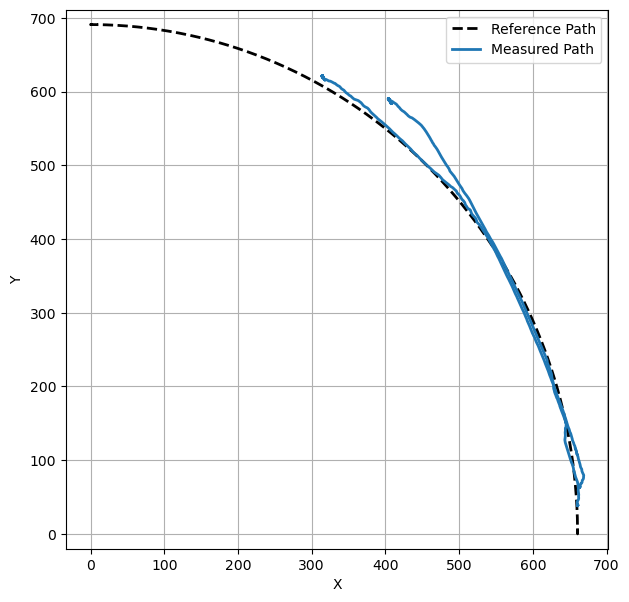

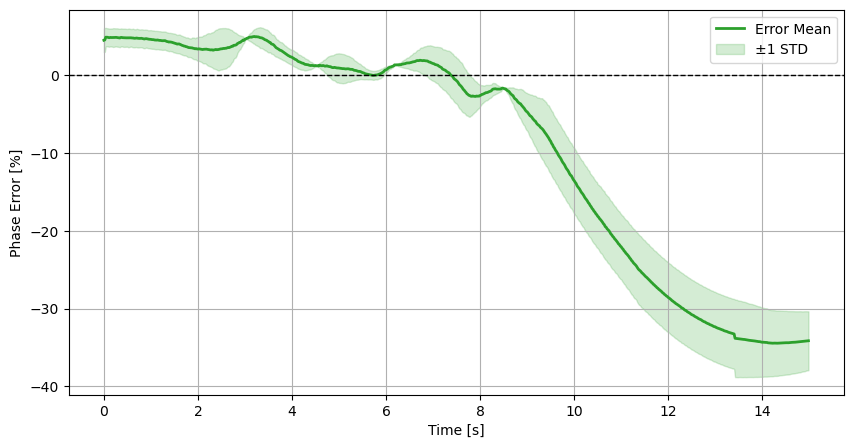

In [405]:
group = 'Datas' if 'Datas' in group_channel_map else list(group_channel_map.keys())[0]
print(f"\n▶ Using group: {group}")

sample_rate  = 50
cut_sec      = 15
num_cycles   = 5
base_color   = 'C0'
lw_overlay   = 2    # Overlay plot 굵기

traj   = tdms[group]['Trajectory'][:]
ref_x  = tdms[group]['Reference Position X'][:]
ref_y  = tdms[group]['Reference Position Y'][:]
act_x  = tdms[group]['Measured Position X'][:]
act_y  = tdms[group]['Measured Position Y'][:]
time   = np.arange(len(traj)) / sample_rate

traj_bin = (traj > 0.5).astype(int)
phase_ref_deg = np.degrees((np.arctan2(ref_y, ref_x) + 2*np.pi) % (2*np.pi))
phase_act_deg = np.degrees((np.arctan2(act_y, act_x) + 2*np.pi) % (2*np.pi))
phase_ref_deg = ((phase_ref_deg + 180) % 360) - 180
phase_act_deg = ((phase_act_deg + 180) % 360) - 180

cut_len = int(cut_sec * sample_rate)
rising_idx = np.where((traj_bin[:-1] == 0) & (traj_bin[1:] == 1))[0] + 1

segments_act, segments_ref = [], []
segments_refX, segments_refY = [], []
segments_actX, segments_actY = [], []
segments_err = []

# for s in rising_idx[-num_cycles:]:
#     if s + cut_len <= len(traj_bin):
#         # phase trajectory
#         seg_act = phase_act_deg[s:s+cut_len].copy()
#         seg_ref = phase_ref_deg[s:s+cut_len].copy()
#         segments_act.append(seg_act)
#         segments_ref.append(seg_ref)
#         # Cartesian trajectory
#         segments_refX.append(ref_x[s:s+cut_len].copy())
#         segments_refY.append(ref_y[s:s+cut_len].copy())
#         segments_actX.append(act_x[s:s+cut_len].copy())
#         segments_actY.append(act_y[s:s+cut_len].copy())
#         # error
#         seg_err = (seg_ref - seg_act)
#         seg_err = (seg_err + 180) % 360 - 180  # -180~180 wrap
#         seg_err_scaled = seg_err / -90 * 100
#         segments_err.append(seg_err_scaled)



for i in selected_indices:
    if i < len(rising_idx):
        s = rising_idx[i]
        if s + cut_len <= len(traj_bin):
            # phase trajectory
            seg_act = phase_act_deg[s:s+cut_len].copy()
            seg_ref = phase_ref_deg[s:s+cut_len].copy()
            segments_act.append(seg_act)
            segments_ref.append(seg_ref)
            # Cartesian trajectory
            segments_refX.append(ref_x[s:s+cut_len].copy())
            segments_refY.append(ref_y[s:s+cut_len].copy())
            segments_actX.append(act_x[s:s+cut_len].copy())
            segments_actY.append(act_y[s:s+cut_len].copy())
            # error
            seg_err = (seg_ref - seg_act)
            seg_err = (seg_err + 180) % 360 - 180  # -180~180 wrap
            seg_err_scaled = seg_err / -90 * 100
            segments_err.append(seg_err_scaled)



if len(segments_act) == 0:
    print("추출된 cycle이 없습니다.")
else:
    segments_act = np.vstack(segments_act)
    segments_ref = np.vstack(segments_ref)
    segments_refX = np.vstack(segments_refX)
    segments_refY = np.vstack(segments_refY)
    segments_actX = np.vstack(segments_actX)
    segments_actY = np.vstack(segments_actY)
    segments_err = np.vstack(segments_err)
    t_short = np.arange(cut_len) / sample_rate

    # === Phase Overlay Plot ===
    plt.figure(figsize=(10,5))
    plt.plot(t_short, segments_ref[-1], color='black', linestyle='--', linewidth=lw_overlay, label='Reference Trajectory')
    for idx2, seg in enumerate(segments_act):
        alpha = 1
        lw = 2
        if idx2 == len(segments_act)-1:
            label = 'Measured Trajectory'
        else:
            label = None
        plt.plot(t_short, seg, color=base_color, alpha=alpha, lw=lw_overlay, label=label)
    plt.xlabel('Time [s]')
    plt.ylabel('Phase [deg]')
    # plt.title(f'Overlay: Last {num_cycles} cycles (Each {cut_sec}s)')
    plt.legend(ncol=2)
    plt.grid(True)
    plt.show()

    # === Cartesian Overlay Plot ===
    plt.figure(figsize=(7,7))
    plt.plot(segments_refX[-1], segments_refY[-1], 'k--', lw=lw_overlay, label='Reference Path')
    for idx2, seg in enumerate(segments_act):
        alpha = 1
        lw = 2
        if idx2 == len(segments_act)-1:
            label = 'Measured Path'
        else:
            label = None
        plt.plot(segments_actX[idx2], segments_actY[idx2], color=base_color, alpha=alpha, lw=lw_overlay, label=label if idx2==len(segments_actX)-1 else None)
    plt.xlabel('X')
    plt.ylabel('Y')
    # plt.title(f'Cartesian Overlay: Last {num_cycles} cycles')
    plt.legend()
    plt.axis('equal')
    plt.grid(True)
    plt.show()

    # === Error Mean ± STD Plot ===
    mean_err = np.mean(segments_err, axis=0)
    std_err  = np.std(segments_err, axis=0)
    plt.figure(figsize=(10,5))
    plt.plot(t_short, mean_err, color='C2', lw=2, label='Error Mean')
    plt.fill_between(t_short, mean_err-std_err, mean_err+std_err, color='C2', alpha=0.2, label='±1 STD')
    plt.axhline(0, color='k', linestyle='--', lw=1)
    plt.xlabel('Time [s]')
    plt.ylabel('Phase Error [%]')
    # plt.title(f'Phase Error (Mean ± STD), Last {num_cycles} cycles, Each {cut_sec}s')
    plt.legend()
    plt.grid(True)
    plt.show()